In [1]:
cd TileEM/

/Users/dorislee/Desktop/Research/seg/crowd-seg/analysis/TileEM


In [2]:
%pylab inline
%load_ext autoreload
%autoreload 2
from TileEM_plot_toolbox import *

Populating the interactive namespace from numpy and matplotlib


In [3]:
img_info,object_tbl,bb_info,hit_info = load_info()

In [23]:
objid=14
bb_objects = bb_info[bb_info["object_id"]==objid]
bb_objects =  bb_objects[bb_objects.worker_id!=3]

In [24]:
obj_x_locs = [process_raw_locs([x,y])[0] for x,y in zip(bb_objects["x_locs"],bb_objects["y_locs"])]
obj_y_locs = [process_raw_locs([x,y])[1] for x,y in zip(bb_objects["x_locs"],bb_objects["y_locs"])]

In [25]:
xylocs = [list(zip(*process_raw_locs([x,y]))) for x,y in zip(bb_objects["x_locs"],bb_objects["y_locs"])]

In [44]:
polygon_lst = []
for xyloc in xylocs:
    polygon_lst.append(Polygon(xyloc).buffer(0))

In [56]:
polygon = Polygon(xylocs[0])
polygon2 = Polygon(xylocs[1])

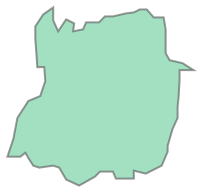

In [64]:
polygon2

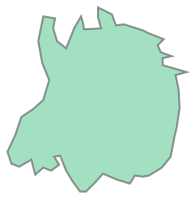

In [63]:
polygon

In [60]:
intersection = polygon2.intersection(polygon)

In [61]:
nonoverlap = (polygon.symmetric_difference(polygon2)).difference(polygon2)

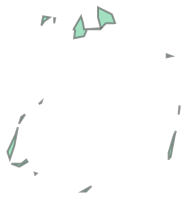

In [62]:
nonoverlap

In [66]:
type(nonoverlap)

shapely.geometry.multipolygon.MultiPolygon

In [ ]:
# multipol1 and multipol2 are my shapely MultiPolygons
from shapely.ops import cascaded_union
from itertools import combinations
from shapely.geometry import Polygon,MultiPolygon

outmulti = []
for pol in multipoly1:
    for pol2 in multipoly2:
        if pol.intersects(pol2)==True:
            # If they intersect, create a new polygon that is
            # essentially pol minus the intersection
            nonoverlap = (pol.symmetric_difference(pol2)).difference(pol2)
            outmulti.append(nonoverlap)

        else:
            # Otherwise, just keep the initial polygon as it is.
            outmulti.append(pol)

finalpol = MultiPolygon(outmulti)

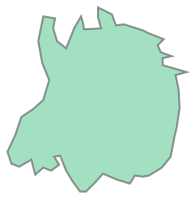

In [57]:
polygon

In [46]:
from shapely.geometry import MultiPolygon

In [47]:
Ji_polygons = MultiPolygon(polygon_lst)
Ji_polygons_buffered = Ji_polygons.buffer(0.001)

In [48]:
import shapely

In [49]:
obj_x_locs = [process_raw_locs([x,y])[0] for x,y in zip(bb_objects["x_locs"],bb_objects["y_locs"])]
obj_y_locs = [process_raw_locs([x,y])[1] for x,y in zip(bb_objects["x_locs"],bb_objects["y_locs"])]

In [50]:
from shapely.geometry import LineString
layer = polygon_lst
rings = [LineString(list(pol.exterior.coords)) for pol in layer]
from shapely.ops import unary_union, polygonize

In [52]:
polygon

NameError: name 'polygon' is not defined

In [51]:
union = unary_union(rings)

ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (465.455 214.909, 465.375 215.625) and LINESTRING (465.455 214.909, 465.25 215.25) at 465.45454545454544 214.90909090909091


ValueError: No Shapely geometry can be created from null value

In [ ]:
result = [geom for geom in polygonize(union)]

In [ ]:
schema=layer.schema.copy()
schema['properties']['area'] = 'float:10.2'
# for index, pol in enumerate(result):
#    #c.write({'geometry': mapping(pol),'properties': {'id': index, 'area': pol.area}})

In [45]:
union =unary_union(polygon_lst)

ERROR:shapely.geos:TopologyException: Input geom 1 is invalid: Self-intersection at or near point 152 274 at 152 274


ValueError: No Shapely geometry can be created from null value

In [ ]:
rings = [LineString(pol.exterior.coords) for pol in circles]
union = unary_union(rings)
result = [geom for geom in polygonize(union)]

In [42]:
circles = polygon_lst

In [44]:
import itertools
for  i,j in itertools.combinations(enumerate(circles), 2):
    if i[1].intersects(j[1]):
        print "polygons", i[0],j[0] 


for  i,j in itertools.permutations(enumerate(circles), 2):
    if i[1].intersects(j[1]):
        print "polygons", i[0],j[0]

polygons 0 1
polygons 0 2
polygons 0 3
polygons 0 4
polygons 0 5
polygons 0 6
polygons 0 7
polygons 0 8
polygons 0 9
polygons 0 10
polygons 0 11
polygons 0 12
polygons 0 13
polygons 0 14
polygons 0 15
polygons 0 16
polygons 0 17
polygons 0 18
polygons 0 19
polygons 0 20
polygons 0 21
polygons 0 22
polygons 0 23
polygons 0 24
polygons 0 25
polygons 0 26
polygons 0 27
polygons 0 28
polygons 0 29
polygons 0 30
polygons 0 31
polygons 0 32
polygons 0 33
polygons 0 34
polygons 0 35
polygons 0 36
polygons 0 37
polygons 0 38
polygons 0 39
polygons 0 40
polygons 1 2
polygons 1 3
polygons 1 4
polygons 1 5
polygons 1 6
polygons 1 7
polygons 1 8
polygons 1 9
polygons 1 10
polygons 1 11
polygons 1 12
polygons 1 13
polygons 1 14
polygons 1 15
polygons 1 16
polygons 1 17
polygons 1 18
polygons 1 19
polygons 1 20
polygons 1 21
polygons 1 22
polygons 1 23
polygons 1 24
polygons 1 25
polygons 1 26
polygons 1 27
polygons 1 28
polygons 1 29
polygons 1 30
polygons 1 31
polygons 1 32
polygons 1 33
polygons 